# Spam of Ham

This proget uses a dataset from the [UCI datasets](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) which stores 5574 SMS that have already been labed as spam or ham.

## Get the data

In [1]:
# import the natural language processing library
import nltk

In [2]:
# download stopwords
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

In [3]:
# Import the 'SMS Spam Collection Data Set' from the UCI 
# Machine Learning Repository
messages = [line.rstrip() for line in open(
    'smsspamcollection/SMSSpamCollection')]

In [4]:
# print the number of SMS contained in the dataset
print(len(messages))

5574


In [5]:
# show the first message contained in the dataset
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
# print the first 10 messages
for mess_no,message in enumerate(messages[:10]):
    print(mess_no,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [7]:
# import the pandas library
import pandas as pd

In [8]:
# open the dataset as a dataframe
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', 
                       sep='\t',names=['label','message'])

In [9]:
# show the dataframe
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analys

In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
# group the dataset according to the label
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

## Feature engineering

In [12]:
# check the lenght of each message
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

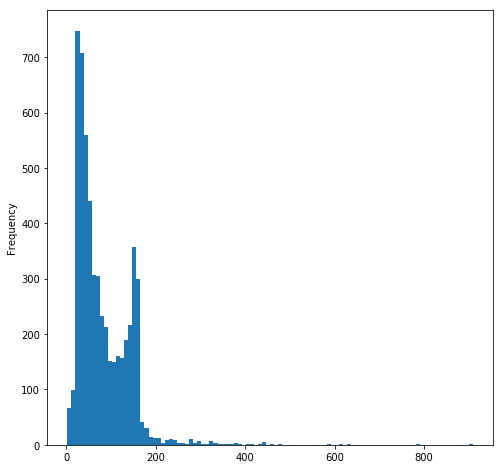

In [14]:
# plot an histogram showing the length of the messages
messages['length'].plot.hist(bins=100,figsize=(8,8))

In [15]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [16]:
# print the longest meesage
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fee66f370f0>,
      dtype=object)

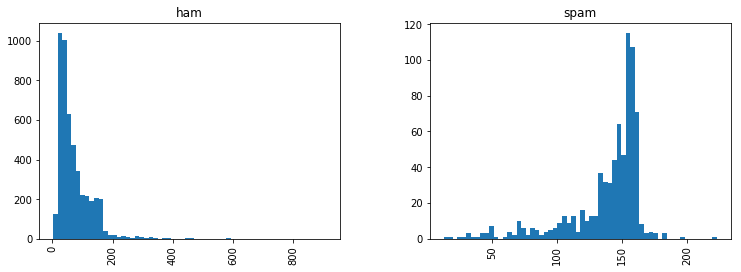

In [17]:
# compare with two histograms the length of the ham and 
# the spam messages
messages.hist(column='length',by='label',bins=60,figsize=(12,4))

## Text Pre-Processing

In [18]:
import string

In [19]:
from nltk.corpus import stopwords

In [20]:
# clean the messages by removing the punctuation and the stop words
def text_process(m):
    """
    1. remove punctuation
    2. remove stop words
    3. return list of clean text words
    """
    
    nopunc = [char for char in m if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return[word for word in nopunc.split() if word.lower() 
           not in stopwords.words('english')]


In [21]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# check how the function works on the first 5 messages
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Vectorization

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
# create a bag of words contaning each word stored in the dataframe
bow_transformer = CountVectorizer(analyzer=text_process).fit(
    messages['message'])

In [25]:
print(len(bow_transformer.vocabulary_))

11425


In [26]:
# test how the algorithm works using message 4
mess4 = messages['message'][3]

In [27]:
print(mess4)

U dun say so early hor... U c already then say...


In [28]:
# checks the frequency of each word
bow4 = bow_transformer.transform([mess4])

In [29]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [30]:
# print the two words that appear twice in the 4th message
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


In [31]:
# calculate how many times each word appears in each message
messages_bow = bow_transformer.transform(messages['message'])

In [32]:
print('Shape of the Sparse Matrix: ',messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of the Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


5572 represents the number of messages and 11425 the number of unique words

####  Term frequency-inverse document frequency

This weight is a statistical measure used to evaluate how important a word is to the dataframe. 
The importance increases proportionally to the number of times a word appears in the dataframe, but is offset by the frequency of the word in a message.

The TF-IDF weight is composed by two terms: 

1. The first (Term Frequency) computes the number of times a word appears, in this case, in a SMS, divided by the total number of words in that SMS.

2. The second term (Inverse Document Frequency) computed as the logarithm of the number of the SMS in the dataframe divided by the number of SMS where the specific word appears.

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer

In [34]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [35]:
# calculate the weighted valie of each word contained in the 4th SMS
tfidf4 = tfidf_transformer.transform(bow4)

In [36]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [37]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [38]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

## Train the model

To determine if a message is ham or spam the Naive Bayse classifier is used.

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['label'])

In [41]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [42]:
messages['label'][3]

'ham'

In [43]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [44]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [45]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



Because to train and test the model the model can't be trained on the entire dataset the dataset is spilt in training and testing.

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
msg_train, msg_test, label_train, label_test = train_test_split(
    messages['message'],messages['label'])

In [48]:
# in order to avoid repeating the previous steps for both the train 
# and the test dataset a pipeline is created

from sklearn.pipeline import Pipeline

In [49]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [50]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fee65af4620>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [51]:
predictions = pipeline.predict(msg_test)

In [52]:
print (classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1211
        spam       1.00      0.75      0.86       182

    accuracy                           0.97      1393
   macro avg       0.98      0.88      0.92      1393
weighted avg       0.97      0.97      0.97      1393

